In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


(300, 300, 3)


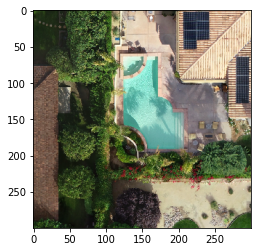

In [0]:
path0 = '/content/gdrive/My Drive/project_files/'
path = path0+'image-chips/'
image = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert the image from BGR to GRAY

print(image.shape)
plt.imshow(image)

(300, 300, 3)
[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[0 1 2 3 4]


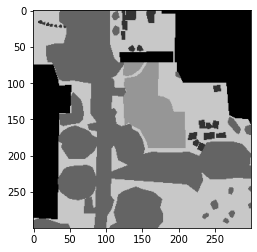

In [0]:
path = path0+'label-chips/'
GT = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(GT.shape)
image_grount_truth = GT[:,:,0]
GT = np.round(GT*1000)/4
GT = GT.astype('int')
print(GT[:,:,2])
unique_elements = np.unique(GT)
print(unique_elements)

# (075, 025, 230) : BUILDING
# (180, 030, 145) : CLUTTER
# (075, 180, 060) : VEGETATION
# (048, 130, 245) : WATER
# (255, 255, 255) : GROUND
# (200, 130, 000) : CAR
# (255, 000, 255) : IGNORE

plt.imshow(GT*50, cmap='gray')

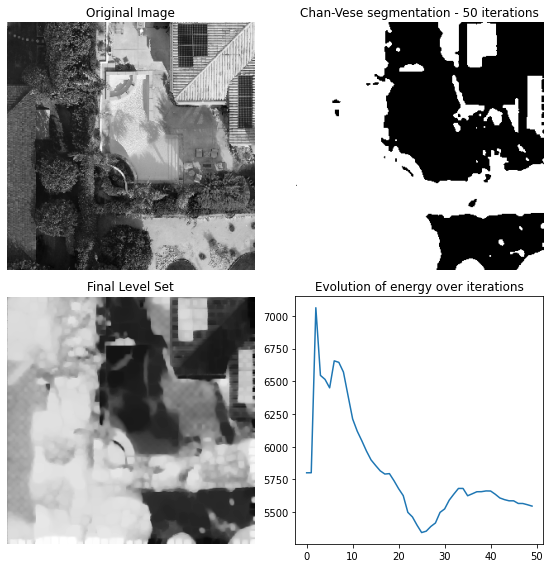

In [0]:
"""
The Chan-Vese segmentation algorithm is designed to segment objects without clearly defined boundaries. 
This algorithm is based on level sets that are evolved iteratively to minimize an energy, 
which is defined by weighted values corresponding to the sum of differences intensity 
from the average value outside the segmented region, the sum of differences from the average value 
inside the segmented region, and a term which is dependent on the length of the boundary of the segmented region.

This algorithm was first proposed by Tony Chan and Luminita Vese, in a publication entitled “An Active Contour Model Without Edges”
"""

import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

image = image_gray.astype(float)
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=100,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=50,
               dt=0.5, extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()


In [0]:
image_segmented = cv[0].copy()

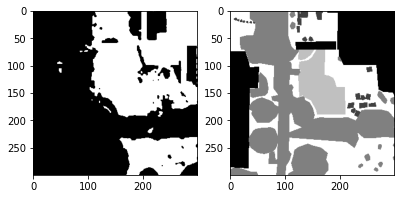

In [0]:
image_segmented_new = np.zeros(image_segmented.shape)
idx = image_segmented==True
image_segmented_new[idx] = 2
idx = image_segmented==False
image_segmented_new[idx] = 4

image_segmented_new = image_segmented_new.astype(int)
fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_segmented_new*40 , cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,0]*40  , cmap='gray')
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6

In [0]:
from skimage.color import rgb2gray
from skimage.metrics import (adapted_rand_error,variation_of_information)

gray_original = rgb2gray(image)

# compute metrics
Grount_truth_matrix = GT[:,:,0]
# print(Grount_truth_matrix.shape)
# print(gray_original.shape)
# print(Grount_truth_matrix)
# print(image_segmented_new)

error, precision, recall = adapted_rand_error(Grount_truth_matrix, image_segmented_new)
print("\nChan-Vese:")
print("Error: " , error*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
splits, merges = variation_of_information(Grount_truth_matrix, image_segmented_new)


from sklearn.metrics import accuracy_score
ACC = accuracy_score(Grount_truth_matrix.reshape(Grount_truth_matrix.shape[0]*Grount_truth_matrix.shape[1]), 
                     image_segmented_new.reshape(image_segmented_new.shape[0]*image_segmented_new.shape[1]))
print("ACC: " , ACC*100)


Chan-Vese:
Error:  38.31890160550352
precision:  72.14006904535285
recall:  53.870828442287454
ACC:  51.00444444444444
